In [3]:
!pip install -q keras
import keras

Using TensorFlow backend.


This is a dataset of predicting the room based on the signal strength of wifi from 7 different access points.  I'm going to play around with Keras and sk-learn to see how things go.

The paper that introduces this dataset uses 10-fold cross validation on there NN and gets a 95.16% accuracy.  I get 96.5% accuracy on my NN and I get 98.5% test accuracy from holding out 20% of the data for validation and using 80% to do 10-fold hyperparameter tuning of Gradient Boost.  

My approach is significantly easier and can be done using standard python machine learning toolkits.

paper: https://link-springer-com.mutex.gmu.edu/content/pdf/10.1007%2F978-981-10-3322-3_27.pdf

dataset on UCI: https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split 

# load the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt'
data = pd.read_table(url, header= None, names=['1', '2', '3', '4', '5', '6', '7'], index_col=7)

# now get the data into a format for keras

# first seperate the input from the labels
X = data.iloc[:, 0:7].values
Y = data.index.values

# now do one hot
y = keras.utils.to_categorical(Y - 1)

# now split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Now build the neural network! Going to do a 2 hidden layer network with 5 neurons in each

In [0]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

# first do the input layer to the hidden (network is like 7 - 5 - 5 - 4)
classifier.add(Dense(units = 5, activation = 'relu', kernel_initializer = 'uniform',input_dim=7))
classifier.add(Dense(units = 5, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dense(units = 4, activation = 'softmax', kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [93]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
#y_train

Epoch 1/100
1600/1600 [==============================] - 0s 178us/step - loss: 0.3874 - acc: 0.8756
Epoch 2/100
1600/1600 [==============================] - 0s 213us/step - loss: 0.3777 - acc: 0.8806
Epoch 3/100
1600/1600 [==============================] - 0s 192us/step - loss: 0.3742 - acc: 0.8881
Epoch 4/100
1600/1600 [==============================] - 0s 185us/step - loss: 0.3756 - acc: 0.8944
Epoch 5/100
1600/1600 [==============================] - 0s 185us/step - loss: 0.3709 - acc: 0.8906
Epoch 6/100
1600/1600 [==============================] - 0s 184us/step - loss: 0.3715 - acc: 0.8806
Epoch 7/100
1600/1600 [==============================] - 0s 180us/step - loss: 0.3673 - acc: 0.8837
Epoch 8/100
1600/1600 [==============================] - 0s 182us/step - loss: 0.3753 - acc: 0.8837
Epoch 9/100
1600/1600 [==============================] - 0s 177us/step - loss: 0.3685 - acc: 0.8875
Epoch 10/100
1600/1600 [==============================] - 0s 158us/step - loss: 0.3674 - acc: 0.8906

Epoch 18/100
1600/1600 [==============================] - 0s 160us/step - loss: 0.3524 - acc: 0.8900
Epoch 19/100
1600/1600 [==============================] - 0s 152us/step - loss: 0.3505 - acc: 0.8931
Epoch 20/100
1600/1600 [==============================] - 0s 149us/step - loss: 0.3629 - acc: 0.8862
Epoch 21/100
1600/1600 [==============================] - 0s 153us/step - loss: 0.3478 - acc: 0.8869
Epoch 22/100
1600/1600 [==============================] - 0s 153us/step - loss: 0.3465 - acc: 0.8962
Epoch 23/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3596 - acc: 0.8856
Epoch 24/100
1600/1600 [==============================] - 0s 155us/step - loss: 0.3404 - acc: 0.8987
Epoch 25/100
1600/1600 [==============================] - 0s 154us/step - loss: 0.3471 - acc: 0.8925
Epoch 26/100
1600/1600 [==============================] - 0s 167us/step - loss: 0.3445 - acc: 0.8906
Epoch 27/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3548 - ac

Epoch 35/100
1600/1600 [==============================] - 0s 154us/step - loss: 0.3322 - acc: 0.8894
Epoch 36/100
1600/1600 [==============================] - 0s 161us/step - loss: 0.3438 - acc: 0.8794
Epoch 37/100
1600/1600 [==============================] - 0s 150us/step - loss: 0.3383 - acc: 0.8875
Epoch 38/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3321 - acc: 0.9037
Epoch 39/100
1600/1600 [==============================] - 0s 153us/step - loss: 0.3407 - acc: 0.8837
Epoch 40/100
1600/1600 [==============================] - 0s 155us/step - loss: 0.3393 - acc: 0.8900
Epoch 41/100
1600/1600 [==============================] - 0s 155us/step - loss: 0.3344 - acc: 0.8944
Epoch 42/100
1600/1600 [==============================] - 0s 167us/step - loss: 0.3329 - acc: 0.8981
Epoch 43/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3421 - acc: 0.8962
Epoch 44/100
1600/1600 [==============================] - 0s 154us/step - loss: 0.3375 - ac

1600/1600 [==============================] - 0s 152us/step - loss: 0.3293 - acc: 0.8956
Epoch 52/100
1600/1600 [==============================] - 0s 157us/step - loss: 0.3300 - acc: 0.8875
Epoch 53/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3340 - acc: 0.8869
Epoch 54/100
1600/1600 [==============================] - 0s 151us/step - loss: 0.3246 - acc: 0.8950
Epoch 55/100
1600/1600 [==============================] - 0s 153us/step - loss: 0.3279 - acc: 0.8900
Epoch 56/100
1600/1600 [==============================] - 0s 155us/step - loss: 0.3193 - acc: 0.8987
Epoch 57/100
1600/1600 [==============================] - 0s 174us/step - loss: 0.3212 - acc: 0.8994
Epoch 58/100
1600/1600 [==============================] - 0s 160us/step - loss: 0.3219 - acc: 0.9006
Epoch 59/100
1600/1600 [==============================] - 0s 159us/step - loss: 0.3170 - acc: 0.9006
Epoch 60/100
1600/1600 [==============================] - 0s 174us/step - loss: 0.3188 - acc: 0.8925
Epo

1600/1600 [==============================] - 0s 162us/step - loss: 0.3178 - acc: 0.8981
Epoch 69/100
1600/1600 [==============================] - 0s 160us/step - loss: 0.3271 - acc: 0.8831
Epoch 70/100
1600/1600 [==============================] - 0s 157us/step - loss: 0.3141 - acc: 0.8987
Epoch 71/100
1600/1600 [==============================] - 0s 159us/step - loss: 0.3262 - acc: 0.8919
Epoch 72/100
1600/1600 [==============================] - 0s 159us/step - loss: 0.3176 - acc: 0.8944
Epoch 73/100
1600/1600 [==============================] - 0s 157us/step - loss: 0.3150 - acc: 0.8937
Epoch 74/100
1600/1600 [==============================] - 0s 160us/step - loss: 0.3130 - acc: 0.8931
Epoch 75/100
1600/1600 [==============================] - 0s 151us/step - loss: 0.3095 - acc: 0.9056
Epoch 76/100
1600/1600 [==============================] - 0s 157us/step - loss: 0.3135 - acc: 0.8956
Epoch 77/100
1600/1600 [==============================] - 0s 158us/step - loss: 0.3131 - acc: 0.8987
Epo

1600/1600 [==============================] - 0s 151us/step - loss: 0.3173 - acc: 0.8962
Epoch 85/100
1600/1600 [==============================] - 0s 158us/step - loss: 0.3146 - acc: 0.8931
Epoch 86/100
1600/1600 [==============================] - 0s 151us/step - loss: 0.3047 - acc: 0.9006
Epoch 87/100
1600/1600 [==============================] - 0s 156us/step - loss: 0.3178 - acc: 0.8937
Epoch 88/100
1600/1600 [==============================] - 0s 157us/step - loss: 0.3214 - acc: 0.8931
Epoch 89/100
1600/1600 [==============================] - 0s 154us/step - loss: 0.3090 - acc: 0.8931
Epoch 90/100
1600/1600 [==============================] - 0s 149us/step - loss: 0.3099 - acc: 0.8987
Epoch 91/100
1600/1600 [==============================] - 0s 153us/step - loss: 0.3095 - acc: 0.8969
Epoch 92/100
1600/1600 [==============================] - 0s 154us/step - loss: 0.3046 - acc: 0.9031
Epoch 93/100
1600/1600 [==============================] - 0s 167us/step - loss: 0.3126 - acc: 0.8931
Epo

In [89]:
score = classifier.evaluate(X_test, y_test, batch_size=10)
score

400/400 [==============================] - 0s 256us/step


[0.3884413711726665, 0.8774999931454659]

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit([1,2,3,4])
y_pred = lb.inverse_transform(y_pred)
y_testlb = lb.inverse_transform(y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_testlb, y_pred) 
myCM

array([[ 76,   0,   5,  23],
       [  0,  84,  11,   0],
       [  8,   2,  78,   0],
       [  0,   0,   0, 113]])

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import itertools
## taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "yellow")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

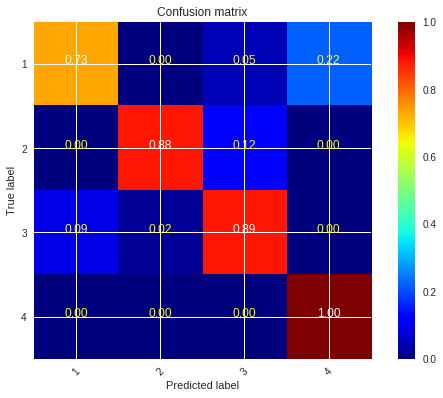

In [92]:
# now plot the heat map of the confusion matrix
plt.figure()
plot_confusion_matrix(myCM, classes=["1","2","3","4"])
plt.show()

In [0]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()

# first do the input layer to the hidden (network is like 7 - 5 - 5 - 4)
classifier.add(Dense(units = 5, activation = keras.layers.LeakyReLU(alpha=0.3), kernel_initializer = 'uniform',input_dim=7))
classifier.add(Dense(units = 5, activation = keras.layers.LeakyReLU(alpha=0.3), kernel_initializer = 'uniform'))
classifier.add(Dense(units = 4, activation = 'softmax', kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
#y_train

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit([1,2,3,4])
y_pred = lb.inverse_transform(y_pred)
y_testlb = lb.inverse_transform(y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_testlb, y_pred) 
myCM

# now plot the heat map of the confusion matrix
plt.figure()
plot_confusion_matrix(myCM, classes=["1","2","3","4"])
plt.show()


In [7]:
myCM

array([[104,   0,   0,   0],
       [  0,  93,   2,   0],
       [  6,   8,  74,   0],
       [ 14,   0,   0,  99]])

In [0]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()

# first do the input layer to the hidden (network is like 7 - 5 - 5 - 4)
classifier.add(Dense(units = 5, activation = keras.layers.ELU(alpha=1.0), kernel_initializer = 'uniform',input_dim=7))
classifier.add(Dense(units = 5, activation = keras.layers.LeakyReLU(alpha=0.3), kernel_initializer = 'uniform'))
classifier.add(Dense(units = 4, activation = 'softmax', kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
#y_train

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit([1,2,3,4])
y_pred = lb.inverse_transform(y_pred)
y_testlb = lb.inverse_transform(y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_testlb, y_pred) 
myCM

# now plot the heat map of the confusion matrix
plt.figure()
plot_confusion_matrix(myCM, classes=["1","2","3","4"])
plt.show()

In [9]:
myCM


array([[104,   0,   0,   0],
       [  0,  90,   5,   0],
       [  1,   1,  86,   0],
       [  3,   0,   0, 110]])

In [0]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()

# first do the input layer to the hidden (network is like 7 - 5 - 5 - 4)
classifier.add(Dense(units = 5, activation = keras.layers.LeakyReLU(alpha=0.3), kernel_initializer = 'uniform',input_dim=7))
classifier.add(Dense(units = 5, activation = keras.layers.ELU(alpha=0.3), kernel_initializer = 'uniform'))
classifier.add(Dense(units = 4, activation = 'softmax', kernel_initializer = 'uniform'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
#y_train

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit([1,2,3,4])
y_pred = lb.inverse_transform(y_pred)
y_testlb = lb.inverse_transform(y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_testlb, y_pred) 
myCM

# now plot the heat map of the confusion matrix
plt.figure()
plot_confusion_matrix(myCM, classes=["1","2","3","4"])
plt.show()

In [23]:
myCM

array([[ 99,   0,   3,   2],
       [  0,  87,   8,   0],
       [  0,   1,  87,   0],
       [  0,   0,   0, 113]])

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit([1,2,3,4])
# y_train = lb.inverse_transform(y_train)
# y_test = lb.inverse_transform(y_test)


clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM

array([[103,   0,   0,   1],
       [  0,  91,   4,   0],
       [  0,   0,  88,   0],
       [  1,   0,   0, 112]])

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM


array([[104,   0,   0,   0],
       [  0,  91,   4,   0],
       [  1,   2,  85,   0],
       [  1,   0,   0, 112]])

Ok, so it looks like I'm able to get better results using GradientBoostingClassifier than I am with a RandomForest or a ANN.  Now lets try SVM.

In [60]:
from sklearn.svm import SVC

clf = SVC(C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM

array([[71, 33,  0,  0],
       [ 0, 93,  2,  0],
       [ 0, 26, 62,  0],
       [ 0, 40,  0, 73]])

In [72]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, random_state=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM

array([[102,   0,   1,   1],
       [  0,  90,   5,   0],
       [  2,   4,  80,   2],
       [  0,   0,   0, 113]])

In [84]:
from sklearn.svm import NuSVC

clf = NuSVC(nu=0.4,kernel='linear', random_state=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM

array([[104,   0,   0,   0],
       [  0,  87,   8,   0],
       [  0,   0,  88,   0],
       [  1,   0,   0, 112]])

Well SVM also does better than NN, and what I'm seeing is that there is a linear relationship that is getting lost.  So, lets see about doing something different with the neural network then.  But first lets see about improving the results of Gradient Boost by doing some hyperparameter tuning.  Well, actually lets make sure RidgeRegression doesn't somehow do really good.

In [95]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(alpha=100,random_state=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM


array([[102,   0,   2,   0],
       [  0,  90,   5,   0],
       [  1,  21,  58,   8],
       [  1,   0,   3, 109]])

Well, as we see the RidgeClassifier doesn't do very well at all.  So, moving on to hyperparameter tuning and seeing where that leaves us in this fun adventure.

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform
gbc = GradientBoostingClassifier()

clf = RandomizedSearchCV(estimator=gbc, param_distributions={'learning_rate':uniform, 'max_depth':randint(1,10)}, cv=10, n_iter=10, random_state=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
myCM = confusion_matrix(y_test, y_pred) 
myCM

array([[104,   0,   0,   0],
       [  0,  90,   5,   0],
       [  0,   0,  88,   0],
       [  1,   0,   0, 112]])

Sooo, wow I was able to get an improvement to the the results by using hyperparameter tuning.  This is pretty cool, probably a good idea to do hyperparameter tuning rather than me guessing and testing a few parameters and deciding on one.  As the output below says the best learning_rate was .419 and max_depth = 3.

In [115]:
clf.best_params_

{'learning_rate': 0.4191945144032948, 'max_depth': 3}

So, that is really cool! I have 99% classification accuracy with Gradient Boost using hyperparameter tuning.  This really works well.  So, I seem to have picked a dataset that maybe wasn't well suited to deep learning?  I'm not sure.  Maybe I did a poor job at tuning the neural network.  I should look into hyperparameter testing for keras.  I think  [hyperas](https://github.com/maxpumperla/hyperas) looks promising since I can even do a pip install.  Do note they list some common errors when running at the end of the README.md.  Probably better to stick with something that is more standard.  It looks like Keras has a Scikit-learn wrapper so that I can acutally just pass the model into RandomizedSearchCV from Scikit-learn and I can do hyperparameter testing that way. On Keras website here is the [documentation](https://keras.io/scikit-learn-api/) and here is an example of someone else who has done this to improve the accuracy [https://dzubo.github.io/machine-learning/2017/05/25/increasing-model-accuracy-by-tuning-parameters.html](https://dzubo.github.io/machine-learning/2017/05/25/increasing-model-accuracy-by-tuning-parameters.html)